# Bar Graphs

Ravi Mandla

Make bar graphs of ATAC promoter regions.

Using code written by Kevin Change (`Bar_Graph_Script.R`)

In [14]:
library(tibble)
library(dplyr)
library(tidyverse)
library(ggplot2)

In [23]:
data = read_csv('~/Documents/rm-home/ise-figures/san_vs_ra_validation/atac-promoters-intergenes-log2fc.csv')

Parsed with column specification:
cols(
  Genes = col_character(),
  Replicate = col_double(),
  log2FC = col_double(),
  Status = col_character()
)



In [32]:
data$Genes <- factor(data$Genes, levels=unique(data$Genes))
data$Replicate <- factor(data$Replicate, levels=unique(data$Replicate))

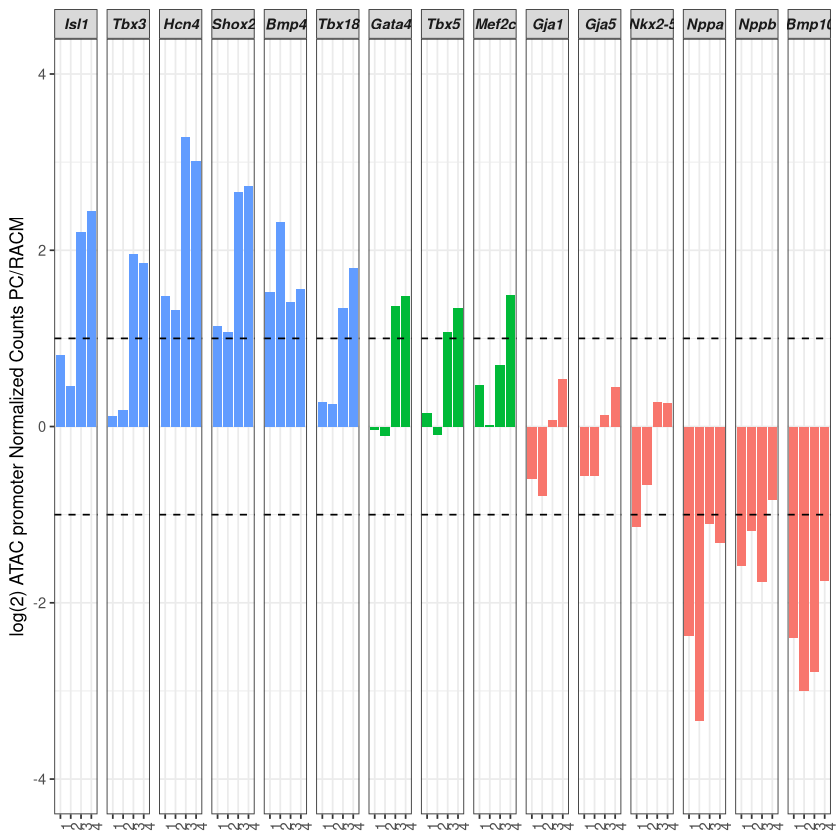

In [35]:
bar <- ggplot(data, aes(x=Replicate, y=log2FC, fill=Status)) +
  geom_bar(stat='identity') +
  facet_wrap(~Genes,ncol = length(unique(data$Genes))) +
  ylim(-4, 4) +
  geom_hline(yintercept=1, linetype="dashed") +
  geom_hline(yintercept=-1, linetype="dashed") +
  theme_bw() +
  theme(axis.text.x = element_text(angle = 90)) +
  theme(strip.text.x = element_text(face="bold.italic")) +
  theme(axis.title.x = element_blank()) +
  ylab("log(2) ATAC promoter Normalized Counts PC/RACM") +
  scale_fill_discrete(breaks=c("SAN>RA", "SAN<RA", "SAN~RA"))
bar

In [37]:
ggsave(filename = "barplot_atac_log2_norm_counts_PC_RACM.png", plot = bar, width = 30, height = 15, dpi = 300, units = "cm")